# Video pipeline with Yolo + Resnet Model

In [20]:
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from typing import Dict, List
import numpy as np

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..")))

from experiments.utils.constants import FINAL_RESULTS_PATH
from experiments.utils.parser import AdaptationParser
import experiments.utils.drawing

In [21]:
metaseries = 14

series_meta = {
    "video": {"IPA": 1, "FA2-low": 2, "FA2-high": 3, "RIM": 5},
    "audio-qa": {"IPA": 21, "FA2-low": 22, "FA2-high": 23, "RIM": 25},
    "audio-sent": {"IPA": 41, "FA2-low": 42, "FA2-high": 43, "RIM": 45},
    "sum-qa": {"IPA": 61, "FA2-low": 62, "FA2-high": 63, "RIM": 65}
}

serie_pipeline = {}
serie_name = {}
for pipeline, series in series_meta.items():
    for name, serie in series.items():
        serie_pipeline[serie] = pipeline
        serie_name[serie] = name
        
        
series_paths = {
series: os.path.join(FINAL_RESULTS_PATH, "metaseries", str(metaseries), "series", str(series))
    for series in serie_pipeline.keys()
}

loaders = {
series: AdaptationParser(
        series_path=series_path, model_name="video", type_of="router_pipeline"
    )
    for series, series_path in series_paths.items()
}

In [22]:
loaders

{1: <experiments.utils.parser.AdaptationParser at 0x7fec3220f940>,
 2: <experiments.utils.parser.AdaptationParser at 0x7fece4277550>,
 3: <experiments.utils.parser.AdaptationParser at 0x7fece4121520>,
 5: <experiments.utils.parser.AdaptationParser at 0x7fece4121610>,
 21: <experiments.utils.parser.AdaptationParser at 0x7fece4133940>,
 22: <experiments.utils.parser.AdaptationParser at 0x7feb8b921fd0>,
 23: <experiments.utils.parser.AdaptationParser at 0x7feb8b8e5d30>,
 25: <experiments.utils.parser.AdaptationParser at 0x7fec31307c10>,
 41: <experiments.utils.parser.AdaptationParser at 0x7fec31f6b7f0>,
 42: <experiments.utils.parser.AdaptationParser at 0x7fec30551d60>,
 43: <experiments.utils.parser.AdaptationParser at 0x7fec305e8a00>,
 45: <experiments.utils.parser.AdaptationParser at 0x7feb8b907c10>,
 61: <experiments.utils.parser.AdaptationParser at 0x7fec30eb4940>,
 62: <experiments.utils.parser.AdaptationParser at 0x7feb8ba87f70>,
 63: <experiments.utils.parser.AdaptationParser at 0

# Real Latencies

In [23]:
timeout_per_second = {}
per_second_results = {}
for series in serie_pipeline.keys():
    timeout_per_second[series], per_second_results[series] = loaders[
        series
    ].per_second_result_processing()

In [24]:
metric = "p99"  # [min, max, p99]
metrics_all = {}
for series in serie_pipeline.keys():
    metric_columns = list(
        filter(lambda col: metric in col, per_second_results[series].columns)
    )
    metrics_all[series] = per_second_results[series][metric_columns]
    metrics_all[series] = metrics_all[series].to_dict(orient="list")
ylabel = "Second"
data = {}


for serie, pipeline in serie_pipeline.items():
    if data.get(pipeline) is None:
        data[pipeline] = {}
    data[pipeline][serie] = metrics_all[serie]["e2e_p99"]


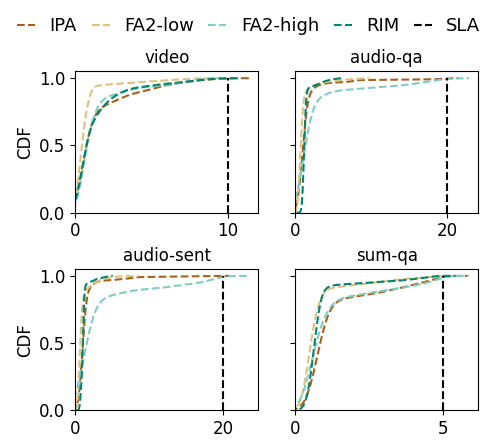

In [47]:
import importlib

importlib.reload(experiments.utils.drawing)
vertical_values = {"video": 10, "audio-qa": 20, "audio-sent": 20, "sum-qa": 5}
serie_color = {"IPA": "#a6611a", "FA2-low": "#dfc27d", "FA2-high": "#80cdc1", "RIM": "#018571"}
experiments.utils.drawing.draw_cdf(data, serie_name, serie_color, vertical_values, vertical_label="SLA", bbox_to_anchor=(1.1, 2.9))